In [3]:
import numpy as np
import pandas as pd
from yaml import safe_load
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import pickle

In [2]:
filenames = []
for file in os.listdir('data'):
    filenames.append(os.path.join('data',file))

In [3]:
filenames[1:10]

['data/434260.yaml',
 'data/587473.yaml',
 'data/685731.yaml',
 'data/415284.yaml',
 'data/1059196.yaml',
 'data/571947.yaml',
 'data/392619.yaml',
 'data/1034823.yaml',
 'data/527016.yaml']

In [4]:
final_df = pd.DataFrame()
counter = 1
for file in tqdm(filenames):
    with open(file, 'r') as f:
        df = pd.json_normalize(safe_load(f))
        df['match_id'] = counter
        final_df = pd.concat([final_df, df], ignore_index=True)
        counter+=1
        
final_df

100%|███████████████████████████████████████| 2033/2033 [09:27<00:00,  3.58it/s]


,innings,meta.data_version,meta.created,meta.revision,info.city,info.dates,info.gender,info.match_type,info.match_type_number,info.outcome.winner,...,info.supersubs.India,info.supersubs.New Zealand,info.supersubs.West Indies,info.supersubs.Africa XI,info.supersubs.Asia XI,info.supersubs.ICC World XI,info.supersubs.Zimbabwe,info.supersubs.England,info.supersubs.Pakistan,info.outcome.eliminator
0,"[{'1st innings': {'team': 'Ireland', 'deliveri...",0.9,2019-07-22,1,Belfast,[2019-07-04],male,ODI,4185.0,Ireland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2010-01-08,2,Mirpur,[2010-01-07],male,ODI,NaN,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2012-12-24,2,Mirpur,[2012-12-05],male,ODI,NaN,West Indies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Pakistan', 'deliver...",0.9,2013-11-30,1,Cape Town,[2013-11-24],male,ODI,NaN,Pakistan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2009-10-01,2,Johannesburg,[2009-09-30],male,ODI,NaN,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,"[{'1st innings': {'team': 'South Africa', 'del...",0.9,2015-09-15,1,Belfast,[2007-06-29],male,ODI,NaN,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029,"[{'1st innings': {'team': 'India', 'deliveries...",0.9,2017-02-14,1,Colombo,[2017-02-10],female,ODI,NaN,India,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2019-06-16,1,London,[2019-06-15],male,ODI,4159.0,Australia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2031,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2015-11-23,1,NaN,[2006-08-06],male,ODI,NaN,Bangladesh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = final_df.copy()

In [6]:
df.info()

# 0,4,5,6,7,9,11,12,13,14,15,16,17,19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   innings                      2033 non-null   object 
 1   meta.data_version            2033 non-null   float64
 2   meta.created                 2033 non-null   object 
 3   meta.revision                2033 non-null   int64  
 4   info.city                    1698 non-null   object 
 5   info.dates                   2033 non-null   object 
 6   info.gender                  2033 non-null   object 
 7   info.match_type              2033 non-null   object 
 8   info.match_type_number       515 non-null    float64
 9   info.outcome.winner          1938 non-null   object 
 10  info.outcome.by.runs         955 non-null    float64
 11  info.overs                   2033 non-null   int64  
 12  info.teams                   2033 non-null   object 
 13  info.toss.decision

In [7]:
df.iloc[:2,0:18]

#1,2,3,5,7,8,17,21,22,23,24,...35

,innings,meta.data_version,meta.created,meta.revision,info.city,info.dates,info.gender,info.match_type,info.match_type_number,info.outcome.winner,info.outcome.by.runs,info.overs,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id
0,"[{'1st innings': {'team': 'Ireland', 'deliveri...",0.9,2019-07-22,1,Belfast,[2019-07-04],male,ODI,4185.0,Ireland,5.0,50,"[Ireland, Zimbabwe]",field,Zimbabwe,"[R Black, S George]","Civil Service Cricket Club, Stormont",1
1,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2010-01-08,2,Mirpur,[2010-01-07],male,ODI,NaN,India,NaN,50,"[Bangladesh, India]",bat,Bangladesh,"[Enamul Haque, IJ Gould]",Shere Bangla National Stadium,2


In [8]:
df.iloc[:2,18:]


,info.outcome.by.wickets,info.player_of_match,info.neutral_venue,info.outcome.method,info.supersubs.Australia,info.supersubs.South Africa,info.outcome.result,info.supersubs.Sri Lanka,info.supersubs.Bangladesh,info.supersubs.India,info.supersubs.New Zealand,info.supersubs.West Indies,info.supersubs.Africa XI,info.supersubs.Asia XI,info.supersubs.ICC World XI,info.supersubs.Zimbabwe,info.supersubs.England,info.supersubs.Pakistan,info.outcome.eliminator
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,[MS Dhoni],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df=df.iloc[:,[0,4,5,6,7,9,11,12,13,14,15,16,17,19]]

In [10]:
df.head(2)

,innings,info.city,info.dates,info.gender,info.match_type,info.outcome.winner,info.overs,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.player_of_match
0,"[{'1st innings': {'team': 'Ireland', 'deliveri...",Belfast,[2019-07-04],male,ODI,Ireland,50,"[Ireland, Zimbabwe]",field,Zimbabwe,"[R Black, S George]","Civil Service Cricket Club, Stormont",1,NaN
1,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",Mirpur,[2010-01-07],male,ODI,India,50,"[Bangladesh, India]",bat,Bangladesh,"[Enamul Haque, IJ Gould]",Shere Bangla National Stadium,2,[MS Dhoni]


In [11]:
df.shape

(2033, 14)

In [12]:
df['info.gender'].value_counts()

info.gender
male      1799
female     234
Name: count, dtype: int64

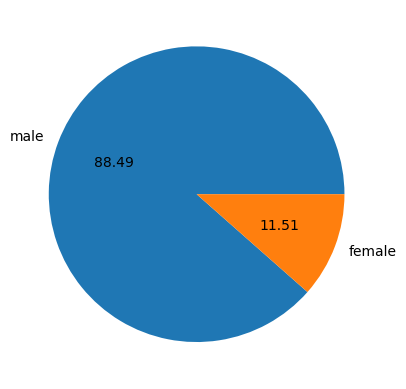

In [13]:
plt.pie(df['info.gender'].value_counts(),labels=['male','female'],autopct="%.2f")
plt.show()

In [14]:
df=df[df['info.gender']=="male"]

In [15]:
df['info.gender'].value_counts()

info.gender
male    1799
Name: count, dtype: int64

In [16]:
df['info.match_type'].value_counts()

info.match_type
ODI    1799
Name: count, dtype: int64

In [17]:
df.drop(columns=['info.match_type'],inplace=True)

In [18]:
df.head(2)

,innings,info.city,info.dates,info.gender,info.outcome.winner,info.overs,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,match_id,info.player_of_match
0,"[{'1st innings': {'team': 'Ireland', 'deliveri...",Belfast,[2019-07-04],male,Ireland,50,"[Ireland, Zimbabwe]",field,Zimbabwe,"[R Black, S George]","Civil Service Cricket Club, Stormont",1,NaN
1,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",Mirpur,[2010-01-07],male,India,50,"[Bangladesh, India]",bat,Bangladesh,"[Enamul Haque, IJ Gould]",Shere Bangla National Stadium,2,[MS Dhoni]


In [19]:
df['info.overs'].value_counts()
df.drop(columns=['info.overs'],inplace=True)

In [20]:
df['info.city'].value_counts()

info.city
Mirpur                88
Colombo               64
London                63
Bulawayo              42
Abu Dhabi             40
                      ..
Glasgow                1
Jamshedpur             1
Adelaide               1
Thiruvananthapuram     1
Bready                 1
Name: count, Length: 127, dtype: int64

In [21]:
df['info.venue'].value_counts()

info.venue
Shere Bangla National Stadium                                      88
Harare Sports Club                                                 73
R Premadasa Stadium                                                47
Queens Sports Club                                                 42
Sheikh Zayed Stadium                                               40
                                                                   ..
Indian Petrochemicals Corporation Limited Sports Complex Ground     1
Ruaraka Sports Club Ground                                          1
Sharjah Cricket Association Stadium                                 1
Greenfield International Stadium                                    1
Wanderers Cricket Ground                                            1
Name: count, Length: 179, dtype: int64

In [22]:
import pickle
pickle.dump(final_df,open('dataset_level1.pkl','wb'))

In [28]:
df = pickle.load(open('dataset_level1.pkl','rb'))

In [29]:
df.iloc[1]['innings'][1]['2nd innings']['deliveries']

[{0.1: {'batsman': 'G Gambhir',
   'bowler': 'Syed Rasel',
   'non_striker': 'V Sehwag',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'G Gambhir',
   'bowler': 'Syed Rasel',
   'non_striker': 'V Sehwag',
   'runs': {'batsman': 4, 'extras': 0, 'total': 4}}},
 {0.3: {'batsman': 'G Gambhir',
   'bowler': 'Syed Rasel',
   'non_striker': 'V Sehwag',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.4: {'batsman': 'G Gambhir',
   'bowler': 'Syed Rasel',
   'non_striker': 'V Sehwag',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.5: {'batsman': 'G Gambhir',
   'bowler': 'Syed Rasel',
   'non_striker': 'V Sehwag',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.6: {'batsman': 'G Gambhir',
   'bowler': 'Syed Rasel',
   'extras': {'noballs': 1},
   'non_striker': 'V Sehwag',
   'runs': {'batsman': 0, 'extras': 1, 'total': 1}}},
 {0.7: {'batsman': 'G Gambhir',
   'bowler': 'Syed Rasel',
   'extras': {'noballs': 1},
   'non_striker': 'V Sehw

In [30]:
# df.iloc[0]['innings'][0]["1st innings"]['team'] batting team

df.iloc[0]['innings']

[{'1st innings': {'team': 'Ireland',
   'deliveries': [{0.1: {'non_striker': 'JA McCollum',
      'bowler': 'KM Jarvis',
      'runs': {'extras': 0, 'total': 0, 'batsman': 0},
      'batsman': 'PR Stirling'}},
    {0.2: {'non_striker': 'JA McCollum',
      'bowler': 'KM Jarvis',
      'runs': {'extras': 0, 'total': 0, 'batsman': 0},
      'batsman': 'PR Stirling'}},
    {0.3: {'non_striker': 'JA McCollum',
      'bowler': 'KM Jarvis',
      'runs': {'extras': 0, 'total': 0, 'batsman': 0},
      'batsman': 'PR Stirling'}},
    {0.4: {'non_striker': 'JA McCollum',
      'bowler': 'KM Jarvis',
      'runs': {'extras': 0, 'total': 0, 'batsman': 0},
      'batsman': 'PR Stirling'}},
    {0.5: {'non_striker': 'JA McCollum',
      'bowler': 'KM Jarvis',
      'runs': {'extras': 0, 'total': 0, 'batsman': 0},
      'batsman': 'PR Stirling'}},
    {0.6: {'non_striker': 'JA McCollum',
      'bowler': 'KM Jarvis',
      'runs': {'extras': 0, 'total': 0, 'batsman': 0},
      'batsman': 'PR Stirling

In [31]:
c=1
for i in df['match_id'].unique():
    if(i==c):
        pass
    else:
        print(c)
        c+=1
        while(i!=c):
            print(c)
            c+=1
    c+=1

#no match id is missing

In [32]:
df.shape

(2033, 37)

In [33]:
df_copy=df.copy()

In [34]:
count = 1
c=0
ball_of_match = []
batsman = []
non_striker=[]
bowler = []
runs = []
player_of_dismissed = []
teams = []
batting_team = []
match_id = []
city = []
venue = []
delivery_df = pd.DataFrame()
for index, row in df.iterrows():
    count+=1
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key,val in ball.items():
            ball_of_match.append(key)
            batsman.append(val['batsman'])
            non_striker.append(val['non_striker'])
            bowler.append(val['bowler'])
            runs.append(val['runs']['total'])
            try:
                player_of_dismissed.append(val['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
            teams.append(row['info.teams'])
            batting_team.append(row['innings'][0]['1st innings']['team'])
            match_id.append(row['match_id'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])

In [35]:
df= pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'batsman':batsman,
            'non_striker':non_striker,
            'bowler':bowler,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })

In [36]:
df.head()

,match_id,teams,batting_team,ball,batsman,non_striker,bowler,runs,player_dismissed,city,venue
0,1,"[Ireland, Zimbabwe]",Ireland,0.1,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont"
1,1,"[Ireland, Zimbabwe]",Ireland,0.2,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont"
2,1,"[Ireland, Zimbabwe]",Ireland,0.3,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont"
3,1,"[Ireland, Zimbabwe]",Ireland,0.4,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont"
4,1,"[Ireland, Zimbabwe]",Ireland,0.5,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont"


In [37]:
df.shape

(588828, 11)

In [38]:
df['city'].isnull().sum()

96830

In [39]:
df['venue'].isnull().sum()

0

In [42]:
df['venue'].value_counts()

venue
Shere Bangla National Stadium                      25458
Harare Sports Club                                 21412
R Premadasa Stadium                                14099
County Ground                                      12324
Sheikh Zayed Stadium                               12119
                                                   ...  
Affies Park                                          271
Toronto Cricket                                      211
Greenfield International Stadium                     198
Darren Sammy National Cricket Stadium, St Lucia      179
Providence Stadium, Guyana                            80
Name: count, Length: 215, dtype: int64

In [44]:
df['batting_team'].unique()

array(['Ireland', 'Bangladesh', 'Pakistan', 'West Indies', 'England',
       'Australia', 'New Zealand', 'South Africa', 'Scotland', 'India',
       'Zimbabwe', 'Sri Lanka', 'Afghanistan', 'Namibia',
       'United Arab Emirates', 'Kenya', 'Papua New Guinea', 'Netherlands',
       'Bermuda', 'United States of America', 'Africa XI', 'Asia XI',
       'Nepal', 'Canada', 'Hong Kong', 'Oman'], dtype=object)

In [45]:
df['batting_team'].value_counts()

batting_team
Australia                   72878
Sri Lanka                   67959
India                       59363
England                     56518
South Africa                51826
Pakistan                    51755
New Zealand                 50018
West Indies                 43377
Bangladesh                  36120
Zimbabwe                    29799
Ireland                     15628
Afghanistan                 15616
Scotland                     9742
United Arab Emirates         5473
Kenya                        3192
Papua New Guinea             2991
Canada                       2722
Netherlands                  2656
Hong Kong                    2271
Bermuda                      2207
United States of America     2180
Namibia                      1378
Nepal                        1130
Asia XI                       934
Oman                          615
Africa XI                     480
Name: count, dtype: int64

In [62]:
def bowl_team(rows):
    for i in rows['teams']:
        if i != rows['batting_team']:
            return i

In [64]:
df['bowling_team']=df.apply(bowl_team,axis=1)

In [65]:
df.head(5)

,match_id,teams,batting_team,ball,batsman,non_striker,bowler,runs,player_dismissed,city,venue,bowling_team
0,1,"[Ireland, Zimbabwe]",Ireland,0.1,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont",Zimbabwe
1,1,"[Ireland, Zimbabwe]",Ireland,0.2,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont",Zimbabwe
2,1,"[Ireland, Zimbabwe]",Ireland,0.3,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont",Zimbabwe
3,1,"[Ireland, Zimbabwe]",Ireland,0.4,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont",Zimbabwe
4,1,"[Ireland, Zimbabwe]",Ireland,0.5,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont",Zimbabwe


In [67]:
df.drop(columns=['teams'],inplace=True)

In [123]:
df.sample(5)

,match_id,batting_team,ball,batsman,non_striker,bowler,runs,player_dismissed,city,venue,bowling_team
415862,1433,India,4.2,S Dhawan,V Kohli,JO Holder,0,0,Visakhapatnam,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,West Indies
145457,500,Pakistan,32.2,Javeria Khan,Bismah Maroof,EAJ Richardson,0,0,Dublin,YMCA Cricket Club,Ireland
386454,1333,South Africa,24.3,H Klaasen,K Verreynne,PJ Cummins,0,0,Paarl,Boland Park,Australia
285599,987,Australia,13.4,DA Warner,JA Burns,SR Thompson,1,0,Belfast,"Civil Service Cricket Club, Stormont",Ireland
449279,1547,England,42.6,EJG Morgan,MM Ali,Imran Tahir,1,0,Leeds,Headingley,South Africa


In [125]:
# Australia                   72878
# Sri Lanka                   67959
# India                       59363
# England                     56518
# South Africa                51826
# Pakistan                    51755
# New Zealand                 50018
# West Indies                 43377
# Bangladesh                  36120
# Zimbabwe                    29799
# Ireland                     15628
# Afghanistan                 15616
# Scotland                     9742
# United Arab Emirates         5473

selected_teams=['Australia','Sri Lanka','India','England','South Africa','Pakistan','New Zealand','West Indies',
               'Bangladesh','Zimbabwe','Ireland','Afghanistan','Scotland','United Arab Emirates']

In [132]:
df=df[df['batting_team'].isin(selected_teams)]
df=df[df['bowling_team'].isin(selected_teams)]

In [134]:
df.shape

(551130, 11)

In [135]:
df.head()

,match_id,batting_team,ball,batsman,non_striker,bowler,runs,player_dismissed,city,venue,bowling_team
0,1,Ireland,0.1,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont",Zimbabwe
1,1,Ireland,0.2,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont",Zimbabwe
2,1,Ireland,0.3,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont",Zimbabwe
3,1,Ireland,0.4,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont",Zimbabwe
4,1,Ireland,0.5,PR Stirling,JA McCollum,KM Jarvis,0,0,Belfast,"Civil Service Cricket Club, Stormont",Zimbabwe


In [140]:
final_df = df[['match_id','batting_team','bowling_team','ball','runs','player_dismissed','city','venue']]

In [141]:
final_df.head()

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,1,Ireland,Zimbabwe,0.1,0,0,Belfast,"Civil Service Cricket Club, Stormont"
1,1,Ireland,Zimbabwe,0.2,0,0,Belfast,"Civil Service Cricket Club, Stormont"
2,1,Ireland,Zimbabwe,0.3,0,0,Belfast,"Civil Service Cricket Club, Stormont"
3,1,Ireland,Zimbabwe,0.4,0,0,Belfast,"Civil Service Cricket Club, Stormont"
4,1,Ireland,Zimbabwe,0.5,0,0,Belfast,"Civil Service Cricket Club, Stormont"


In [142]:
pickle.dump(final_df,open('dataset_level2.pkl','wb'))